In [3]:
#necessary libararies importaed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Load cleaned csv file saved from cleaning data file
final_df = pd.read_csv('f1_cleaned_data.csv')

# Check data before creating model for accuracy
print(final_df.shape)
final_df.head()


(10448, 24)


,raceId,year,round,date,driverId,forename,surname,constructorId,constructor_name,grid,...,q1,q2,q3,position_qualifying,status,positionOrder,circuitId,name_circuits,location,country
0,18,2008,1,2008-03-16,1,Lewis,Hamilton,1,McLaren,1,...,1:26.572,1:25.187,1:26.714,1.0,Finished,1,1,Albert Park Grand Prix Circuit,Melbourne,Australia
1,18,2008,1,2008-03-16,2,Nick,Heidfeld,2,BMW Sauber,5,...,1:25.960,1:25.518,1:27.236,5.0,Finished,2,1,Albert Park Grand Prix Circuit,Melbourne,Australia
2,18,2008,1,2008-03-16,3,Nico,Rosberg,3,Williams,7,...,1:26.295,1:26.059,1:28.687,7.0,Finished,3,1,Albert Park Grand Prix Circuit,Melbourne,Australia
3,18,2008,1,2008-03-16,4,Fernando,Alonso,4,Renault,11,...,1:26.907,1:26.188,\N,12.0,Finished,4,1,Albert Park Grand Prix Circuit,Melbourne,Australia
4,18,2008,1,2008-03-16,5,Heikki,Kovalainen,1,McLaren,3,...,1:25.664,1:25.452,1:27.079,3.0,Finished,5,1,Albert Park Grand Prix Circuit,Melbourne,Australia


Accuracy: 0.9521531100478469


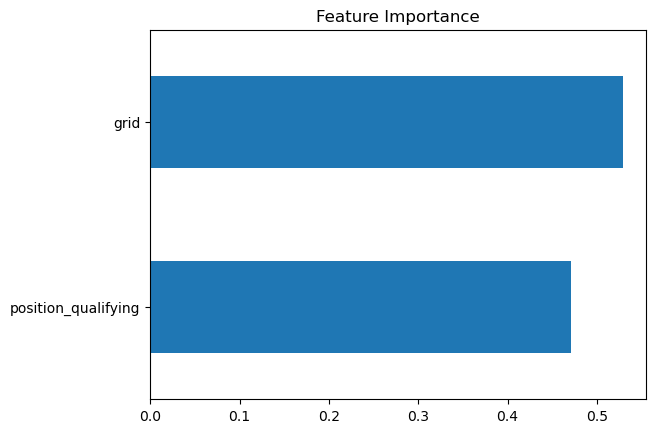

In [5]:
#creating target variable --> 1 = driver win, 0 = driver no win
final_df['winner'] = final_df['positionOrder'].apply(lambda x: 1 if x == 1 else 0)

#using grid position, and qual position as primary features; columns used to predict winners mainly
features = ['grid', 'position_qualifying']
X = final_df[features] #feature matrix

#tackling empty/missing values with median
X = X.fillna(X.median())

#assigning target variable to y
y = final_df['winner']

#splitting data into training and testing sets
# 20% test size, random_state=42 to make results repeatable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#training random forest classifier with 50 estimators with a max depth of trees limited to 10(memory purposes)
model = RandomForestClassifier(n_estimators=50, max_depth = 10, random_state=42)
model.fit(X_train, y_train)

#making the prediction 
y_pred = model.predict(X_test)

# getting probability of prediction and adding to the dataset
y_proba = model.predict_proba(X_test)[:, 1]
final_df['win_probability'] = model.predict_proba(X)[:, 1]

# measuring model performance/accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# saving predictions to csv file for later visualization
final_df.to_csv('f1_simple_predictions.csv', index=False)

# importance plot to see how features(grid and qual position) contribute to prediction)
importances = pd.Series(model.feature_importances_, index=features).sort_values()
importances.plot(kind='barh', title='Feature Importance')
plt.show()
